## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  23.071846  1294.905764  0.713656   5.108950  1.622125
1  27.081317   675.207243  0.049935   6.157567  0.755515
2  89.991441   170.083801  0.968894   3.326109  1.087975
3  71.181191   412.146922  0.512965  10.485515  1.197835
4  21.004259  1478.143656  0.188797   2.776552  1.431807


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9817286	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9739921	total: 70.1ms	remaining: 35s
2:	learn: 0.9635946	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9535209	total: 71.2ms	remaining: 17.7s
4:	learn: 0.9433496	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9355987	total: 72.4ms	remaining: 12s
6:	learn: 0.9272102	total: 73.1ms	remaining: 10.4s
7:	learn: 0.9157193	total: 73.6ms	remaining: 9.13s
8:	learn: 0.9080655	total: 74ms	remaining: 8.15s
9:	learn: 0.8990253	total: 74.5ms	remaining: 7.38s
10:	learn: 0.8918982	total: 75ms	remaining: 6.75s
11:	learn: 0.8833548	total: 75.5ms	remaining: 6.22s
12:	learn: 0.8770483	total: 76.1ms	remaining: 5.77s
13:	learn: 0.8677573	total: 76.6ms	remaining: 5.4s
14:	learn: 0.8581241	total: 77.1ms	remaining: 5.07s
15:	learn: 0.8499417	total: 77.6ms	remaining: 4.77s
16:	learn: 0.8407759	total: 78.1ms	remaining: 4.52s
17:	learn: 0.8328401	total: 78.8ms	remaining: 4.3s
18:	learn: 0.8251782	total: 79.2ms	remaining: 4.09s
19

91:	learn: 0.4542695	total: 109ms	remaining: 1.07s
92:	learn: 0.4505461	total: 109ms	remaining: 1.06s
93:	learn: 0.4471464	total: 110ms	remaining: 1.06s
94:	learn: 0.4435497	total: 110ms	remaining: 1.05s
95:	learn: 0.4406661	total: 110ms	remaining: 1.04s
96:	learn: 0.4373196	total: 111ms	remaining: 1.03s
97:	learn: 0.4348724	total: 111ms	remaining: 1.02s
98:	learn: 0.4313116	total: 112ms	remaining: 1.01s
99:	learn: 0.4287272	total: 112ms	remaining: 1.01s
100:	learn: 0.4253310	total: 112ms	remaining: 1000ms
101:	learn: 0.4216771	total: 113ms	remaining: 992ms
102:	learn: 0.4186690	total: 113ms	remaining: 985ms
103:	learn: 0.4160816	total: 114ms	remaining: 979ms
104:	learn: 0.4129185	total: 114ms	remaining: 973ms
105:	learn: 0.4097112	total: 115ms	remaining: 968ms
106:	learn: 0.4069961	total: 115ms	remaining: 962ms
107:	learn: 0.4048307	total: 116ms	remaining: 955ms
108:	learn: 0.4026538	total: 116ms	remaining: 949ms
109:	learn: 0.3998010	total: 116ms	remaining: 942ms
110:	learn: 0.396178

268:	learn: 0.2070839	total: 186ms	remaining: 506ms
269:	learn: 0.2067077	total: 187ms	remaining: 505ms
270:	learn: 0.2059415	total: 187ms	remaining: 504ms
271:	learn: 0.2055659	total: 188ms	remaining: 502ms
272:	learn: 0.2052348	total: 188ms	remaining: 500ms
273:	learn: 0.2049645	total: 188ms	remaining: 499ms
274:	learn: 0.2047016	total: 189ms	remaining: 497ms
275:	learn: 0.2038817	total: 189ms	remaining: 496ms
276:	learn: 0.2028576	total: 190ms	remaining: 495ms
277:	learn: 0.2025983	total: 190ms	remaining: 493ms
278:	learn: 0.2023601	total: 190ms	remaining: 492ms
279:	learn: 0.2018342	total: 191ms	remaining: 491ms
280:	learn: 0.2015690	total: 191ms	remaining: 490ms
281:	learn: 0.2008751	total: 192ms	remaining: 489ms
282:	learn: 0.2002225	total: 193ms	remaining: 488ms
283:	learn: 0.1995923	total: 193ms	remaining: 487ms
284:	learn: 0.1992839	total: 194ms	remaining: 486ms
285:	learn: 0.1986456	total: 194ms	remaining: 484ms
286:	learn: 0.1976866	total: 194ms	remaining: 483ms
287:	learn: 

512:	learn: 0.1076680	total: 290ms	remaining: 276ms
513:	learn: 0.1072082	total: 291ms	remaining: 275ms
514:	learn: 0.1069184	total: 291ms	remaining: 274ms
515:	learn: 0.1065269	total: 292ms	remaining: 274ms
516:	learn: 0.1060845	total: 292ms	remaining: 273ms
517:	learn: 0.1058040	total: 292ms	remaining: 272ms
518:	learn: 0.1053592	total: 293ms	remaining: 271ms
519:	learn: 0.1049408	total: 293ms	remaining: 271ms
520:	learn: 0.1046697	total: 294ms	remaining: 270ms
521:	learn: 0.1042908	total: 294ms	remaining: 269ms
522:	learn: 0.1039946	total: 294ms	remaining: 268ms
523:	learn: 0.1034939	total: 295ms	remaining: 268ms
524:	learn: 0.1032189	total: 295ms	remaining: 267ms
525:	learn: 0.1027178	total: 296ms	remaining: 266ms
526:	learn: 0.1023220	total: 296ms	remaining: 266ms
527:	learn: 0.1018396	total: 297ms	remaining: 265ms
528:	learn: 0.1015433	total: 297ms	remaining: 265ms
529:	learn: 0.1011156	total: 297ms	remaining: 264ms
530:	learn: 0.1008502	total: 298ms	remaining: 263ms
531:	learn: 

693:	learn: 0.0653255	total: 368ms	remaining: 162ms
694:	learn: 0.0650260	total: 369ms	remaining: 162ms
695:	learn: 0.0648292	total: 369ms	remaining: 161ms
696:	learn: 0.0647642	total: 370ms	remaining: 161ms
697:	learn: 0.0646810	total: 370ms	remaining: 160ms
698:	learn: 0.0646175	total: 370ms	remaining: 159ms
699:	learn: 0.0644953	total: 371ms	remaining: 159ms
700:	learn: 0.0643756	total: 371ms	remaining: 158ms
701:	learn: 0.0641816	total: 372ms	remaining: 158ms
702:	learn: 0.0641161	total: 372ms	remaining: 157ms
703:	learn: 0.0638830	total: 372ms	remaining: 157ms
704:	learn: 0.0636925	total: 373ms	remaining: 156ms
705:	learn: 0.0636287	total: 373ms	remaining: 155ms
706:	learn: 0.0635672	total: 374ms	remaining: 155ms
707:	learn: 0.0633847	total: 374ms	remaining: 154ms
708:	learn: 0.0631577	total: 375ms	remaining: 154ms
709:	learn: 0.0629703	total: 375ms	remaining: 153ms
710:	learn: 0.0628749	total: 375ms	remaining: 153ms
711:	learn: 0.0626922	total: 376ms	remaining: 152ms
712:	learn: 

936:	learn: 0.0374741	total: 473ms	remaining: 31.8ms
937:	learn: 0.0373135	total: 473ms	remaining: 31.3ms
938:	learn: 0.0372313	total: 474ms	remaining: 30.8ms
939:	learn: 0.0370839	total: 474ms	remaining: 30.3ms
940:	learn: 0.0370033	total: 475ms	remaining: 29.8ms
941:	learn: 0.0368364	total: 475ms	remaining: 29.3ms
942:	learn: 0.0367354	total: 476ms	remaining: 28.7ms
943:	learn: 0.0365938	total: 476ms	remaining: 28.2ms
944:	learn: 0.0364665	total: 476ms	remaining: 27.7ms
945:	learn: 0.0363320	total: 477ms	remaining: 27.2ms
946:	learn: 0.0362545	total: 477ms	remaining: 26.7ms
947:	learn: 0.0361160	total: 478ms	remaining: 26.2ms
948:	learn: 0.0360339	total: 478ms	remaining: 25.7ms
949:	learn: 0.0359369	total: 479ms	remaining: 25.2ms
950:	learn: 0.0358611	total: 479ms	remaining: 24.7ms
951:	learn: 0.0357262	total: 480ms	remaining: 24.2ms
952:	learn: 0.0356031	total: 480ms	remaining: 23.7ms
953:	learn: 0.0354523	total: 480ms	remaining: 23.2ms
954:	learn: 0.0353787	total: 481ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

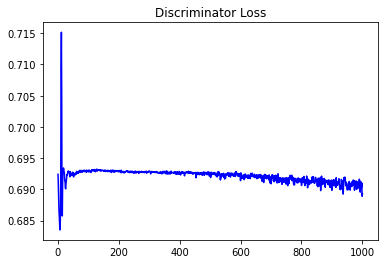

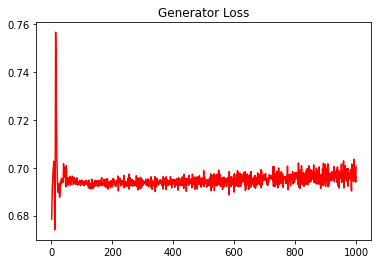

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2804436538736704


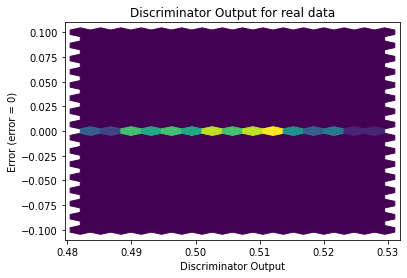

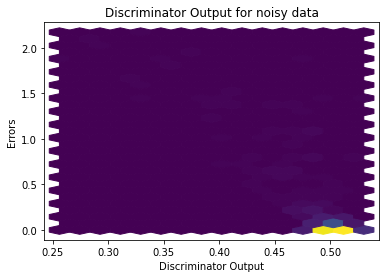

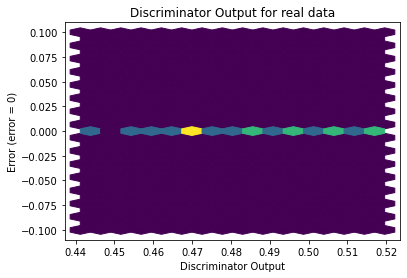

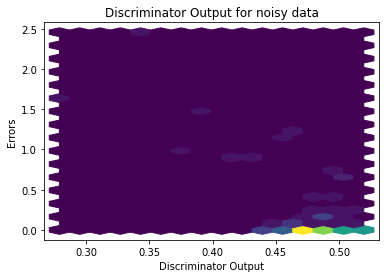

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


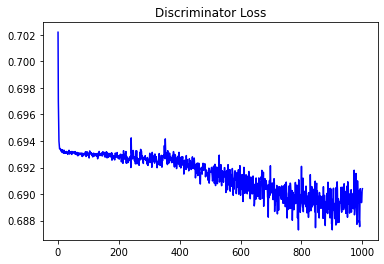

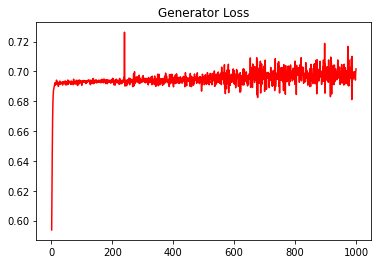

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22128637645837113


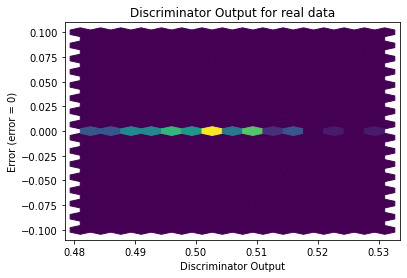

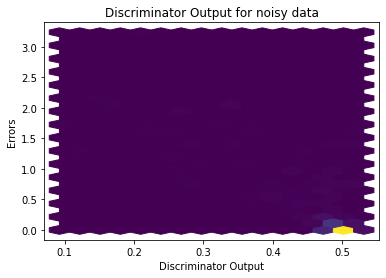

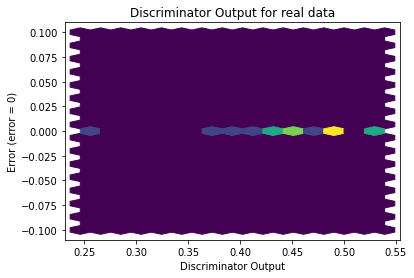

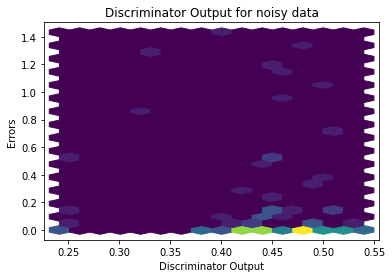

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1441]], requires_grad=True)
